## Project 05
### James Grasell
### May 03, 2021

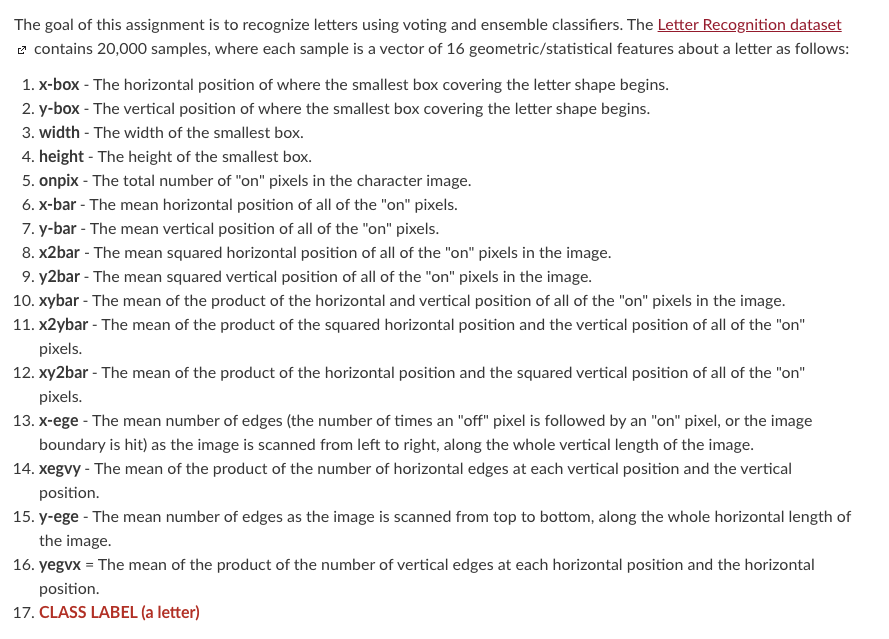

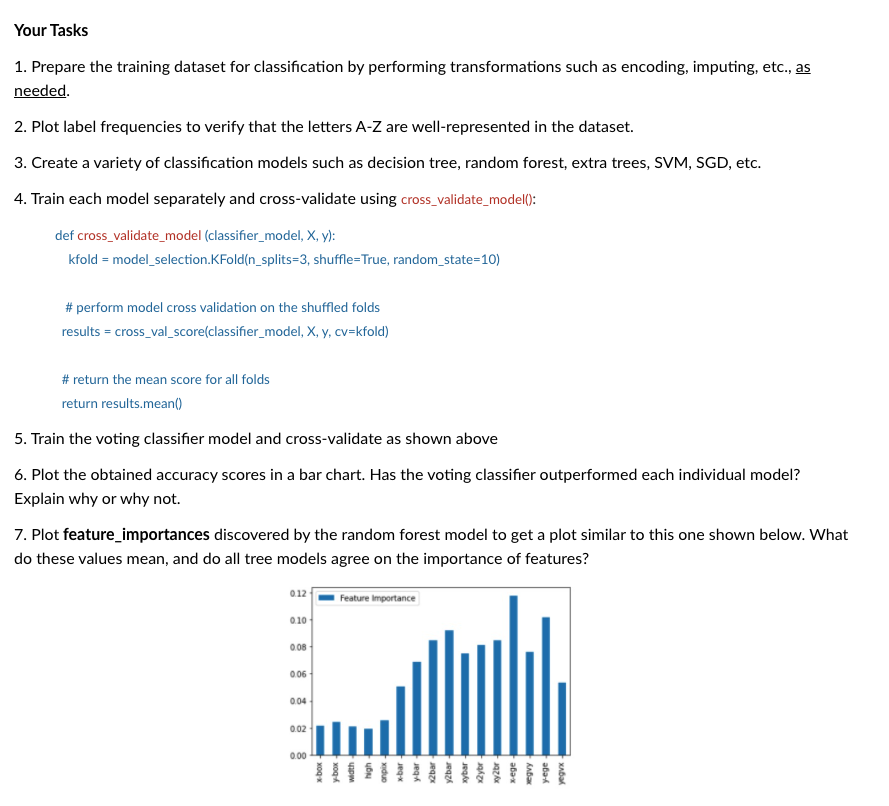

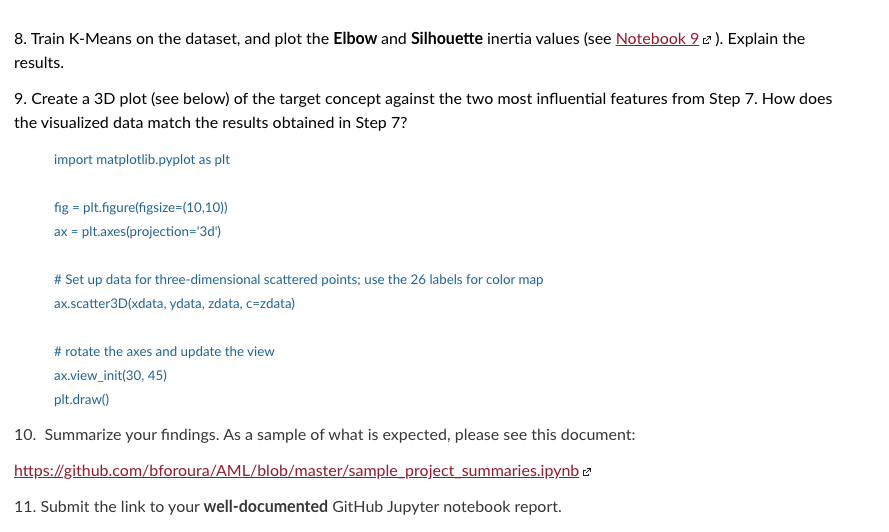

In [1]:
import numpy as np
import pandas as pd

In [16]:
# Read in the Letter Recognition data from github
letters_url = 'https://raw.githubusercontent.com/jimgrasell/AML/master/Project05/Data/letters.txt'
letters_df = pd.read_csv(letters_url)
print(letters_df.head(3))
print(letters_df.shape)

   x-box  y-box  width  high  onpix  ...  x-ege  xegvy  y-ege  yegvx  class
0      2      4      4     3      2  ...      1      8      5      6      Z
1      4      7      5     5      5  ...      2      9      7     10      P
2      7     10      8     7      4  ...      2      5      5     10      S

[3 rows x 17 columns]
(20000, 17)


In [5]:
# Missing data in the letters dataframe
letters_df.isnull().sum()

# No missing data

x-box    0
y-box    0
width    0
high     0
onpix    0
x-bar    0
y-bar    0
x2bar    0
y2bar    0
xybar    0
x2ybr    0
xy2br    0
x-ege    0
xegvy    0
y-ege    0
yegvx    0
class    0
dtype: int64

In [14]:
# Verify that each letter is fairly represented
letters_df.groupby(['class'])['class'].count()

# All letters A-Z are well represented in the dataframe

class
A    789
B    766
C    736
D    805
E    768
F    775
G    773
H    734
I    755
J    747
K    739
L    761
M    792
N    783
O    753
P    803
Q    783
R    758
S    748
T    796
U    813
V    764
W    752
X    787
Y    786
Z    734
Name: class, dtype: int64

In [17]:
# Split target from features
X = letters_df.drop(['class'], axis=1)
y = letters_df['class']

print(X.head(3))
print(y.head(3))

   x-box  y-box  width  high  onpix  ...  xy2br  x-ege  xegvy  y-ege  yegvx
0      2      4      4     3      2  ...      7      1      8      5      6
1      4      7      5     5      5  ...      9      2      9      7     10
2      7     10      8     7      4  ...      8      2      5      5     10

[3 rows x 16 columns]
0    Z
1    P
2    S
Name: class, dtype: object


In [20]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

In [21]:
# Standardize the numeric features

num_cols = ['x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar',
           'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

num_transformer = Pipeline(steps=[
      ('scaler', StandardScaler())

])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
    ])

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import SGDClassifier

num_folds = 10

########## A decicion tree with gini
gini_dt_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(criterion='gini'))])

gini_dt_score = cross_val_score(gini_dt_clf, X, y, cv=num_folds, scoring="accuracy").mean()


########## A decicion tree with entropy
entropy_dt_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(criterion='entropy'))])

entropy_dt_score = cross_val_score(entropy_dt_clf, X, y, cv=num_folds, scoring="accuracy").mean()


########## An RBF kernel classifier
rbf_svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='rbf'))])

rbf_svc_clf_score = cross_val_score(rbf_svc_clf, X, y, cv=num_folds, scoring="accuracy").mean()


########## A poly kernel classifier
poly_svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='poly'))])

poly_svc_clf_score = cross_val_score(poly_svc_clf, X, y, cv=num_folds, scoring="accuracy").mean()

########## A linear kernel classifier
linear_svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='linear'))])

linear_svc_clf_score = cross_val_score(linear_svc_clf, X, y, cv=num_folds, scoring="accuracy").mean()

########## A random forrest classifier
rf_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators = 5, random_state = 0))])

rf_clf_score = cross_val_score(rf_clf, X, y, cv=num_folds, scoring="accuracy").mean()

########## A SGD classifier
sgd_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SGDClassifier(max_iter=250, tol=1e-3))])

sgd_clf_score = cross_val_score(sgd_clf, X, y, cv=num_folds, scoring="accuracy").mean()

In [47]:
# Voting Classifier

gini_dt = DecisionTreeClassifier(criterion='gini')
entropy_dt = DecisionTreeClassifier(criterion='entropy')
svc_rbf = SVC(kernel='rbf')
svc_poly = SVC(kernel='poly')
svc_linear = SVC(kernel='linear')
rf = RandomForestClassifier(n_estimators = 5, random_state = 0)
sgd = SGDClassifier(max_iter=250, tol=1e-3)

voting_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', VotingClassifier( estimators=[("gini_dt", gini_dt), ("entropy_dt", entropy_dt),
                      ("svc_rbf", svc_rbf), ("svc_poly", svc_poly), ("svc_linear", svc_linear),
                      ("rf", rf), ("sgd", sgd)], voting="hard" ))])

voting_clf_score = cross_val_score(voting_clf, X, y, cv=num_folds, scoring="accuracy").mean()
print(voting_clf_score)

0.9483499999999999


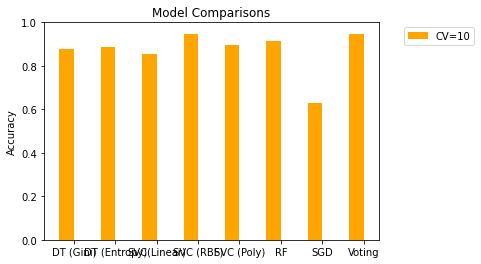

In [49]:
# Summarize the findings for all models

labels = ['DT (Gini)', 'DT (Entropy)', 'SVC(Linear)', 'SVC (RBF)', 'SVC (Poly)', 'RF', 'SGD', 'Voting']
training_scores = [gini_dt_score, entropy_dt_score, linear_svc_clf_score, rbf_svc_clf_score, poly_svc_clf_score, rf_clf_score, sgd_clf_score, voting_clf_score]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='CV=10', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Model Comparisons')
plt.show()

In [48]:
# The Voting Classifier and SVC (RBF) perform equally well when comparing accuracy. 
# Voting Classifier = 0.9483
# SVC (RBF)         = 0.9482

Feature: 0, Score: 0.02467
Feature: 1, Score: 0.02301
Feature: 2, Score: 0.02153
Feature: 3, Score: 0.01877
Feature: 4, Score: 0.02534
Feature: 5, Score: 0.05268
Feature: 6, Score: 0.07244
Feature: 7, Score: 0.08500
Feature: 8, Score: 0.09346
Feature: 9, Score: 0.08288
Feature: 10, Score: 0.06997
Feature: 11, Score: 0.08532
Feature: 12, Score: 0.11743
Feature: 13, Score: 0.08088
Feature: 14, Score: 0.09230
Feature: 15, Score: 0.05433


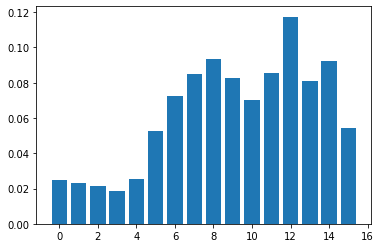

In [52]:
# get feature importances from the model
from matplotlib import pyplot
rf_clf['classifier'].fit(preprocessor.fit_transform(X), y)
importance = rf_clf['classifier'].feature_importances_

# summarize feature importances
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
# plot feature importances
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [53]:
# Feature 12 (x-ege) is the most important followed by feature 8 (y2bar)

In [61]:
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

print(inertias)

[1710002.03035, 1381893.1754136747, 1250585.422695637, 1156040.1940800434, 1077132.2514384994, 1016951.7305695355, 971453.159534364, 929056.9539819637, 887855.5962107776]


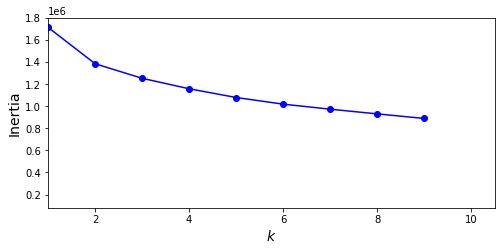

In [70]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 10.5, 80000, 1800000])
plt.show()

The elbow plot indicates that the number of clusters should be = 2 (k = 2)

In [74]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]
print(silhouette_scores)            

<function silhouette_score at 0x7f5d1b833dd0>


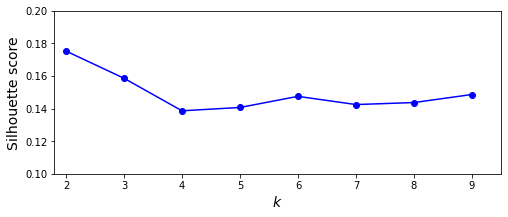

In [76]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 9.5, 0.1, 0.2])
plt.show()

The silhouette plot is consistant with the elbow plot indication that two clusters is optimal (k = 2)

In [80]:
import plotly.express as px

fig = px.scatter_3d(letters_df, x='x-ege', y='y2bar', z='class',
              color='class')
fig.show()

## Summary



*   SVC (RBF) and the Voting Classifier had approximately the same accuracy at 95%
*   x-ege is the most important feature followed by y2bar
*   The elbow and sihlouette plots indicate the optimal number of clusters when using K-Means is 2 clusters
*   Data was standardized prior to running any of the models

